## Exact simulation of the 3/2 model

We closely follow the approach from Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) to simulate exactly the stock price or index under the 3/2 model. The dynamics of the stock price under the 3/2 model under the risk-neutral measure are given by

$$
 \frac{dS_t}{S_t} = rdt + \sqrt{V_t}\rho dW_t^1 + \sqrt{V_t}\sqrt{1-\rho^2}dW_t^2 \tag{1}
$$

$$
 dV_t = \kappa V_t (\theta - V_t)dt + \epsilon V_t^{3/2}dW_t^1 \tag{2}
$$

where $W_t^1$ and $W_t^2$ are independent Brownian motions. Regarding the parameters, $r$ represents the constant interest rate, $\rho$ the instantaneous correlation between the return on the stock and the variance process and $\epsilon$ governs the volatility of volatility. The speed of mean reversion is given by $\kappa V_t$ and $\theta$ denotes the long-run mean of the variance process.

Defining $X_t = \frac{1}{V_t}$, we obtain

$$
dX_t = (\kappa + \epsilon^2 - \kappa\theta X_t)dt - \epsilon \sqrt{X_t}dW_t^1 \tag{3}
$$

Hence, using the process $X$, we obtain the following dynamics for the stock price

$$
S_t = S_0{\rm exp} \left\lbrace rt - \frac{1}{2}\int_0^t (X_s)^{-1}ds + \rho\int_0^t (\sqrt{X_s})^{-1}dW_s^1 + \sqrt{1-\rho^2} \int_0^t (\sqrt{X_s})^{-1}dW_s^2 \right\rbrace
$$

It is useful to study ${\rm log}(X_t)$ for which we obtain the dynamics

$$
d{\rm log}(X_t) = \left( \frac{\kappa + \frac{\epsilon^2}{2}}{X_t} - \kappa\theta \right)dt - \epsilon(\sqrt{X_t})^{-1}dW_t^1
$$

Hence

$$
{\rm log}(X_t) = {\rm log}(X_0) + \left(\kappa + \frac{\epsilon^2}{2} \right) \int_0^t \frac{ds}{X_s} - \kappa\theta t - \epsilon \int_0^t (\sqrt{X_s})^{-1}dW_s^1
$$

or equivalently

$$
\int_0^t(\sqrt{X_s})^{-1}dW_s^1 = \frac{1}{\epsilon}\left({\rm log} \left(\frac{X_0}{X_t}\right) + \left(\kappa + \frac{\epsilon^2}{2} \right) \int_0^t \frac{ds}{X_s} - \kappa\theta t \right) \tag{4}
$$

We hence arrive at Algorithm 1

| **Algorithm 1** | Exact Simulation Algorithm for the 3/2 model. |
| - - - - | - - - - |
| Step 1) | Simulate $X_t|X_0$ using the noncentral $\chi^2$-distribution |
| Step 2) | Simulate $\int_0^t \frac{ds}{X_s}|X_t, X_0$ |
| Step 3) | Recover $\int_0^t (\sqrt{X_s})^{-1}dW_s^1$ from Eq. (4) |
| Step 4) | Simulate $S_t$ given $S_0$, $\int_0^t (\sqrt{X_s})^{-1}dW_s^1$ and $\int_0^t (X_s)^{-1}ds$

### Step 1): Simulating $X_t$

$X_t$ is distributed as a noncentral chi-square distribution

$$
\frac{X_t{\rm exp}\lbrace \kappa \theta t \rbrace}{c(t)} \sim \chi^2(\delta, \alpha)
$$

where
$$
\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}, \quad \alpha = \frac{X_0}{c(t)}, \quad c(t) = \frac{\epsilon^2({\rm exp}\lbrace \kappa\theta t \rbrace - 1)}{4\kappa\theta}
$$

### Step 2): Simulating $\int_0^t \frac{ds}{X_s}$ Given $X_t$

Let $X_t$ be given by Eq. (3), then the Laplace transform of the conditional distribution of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
E\left({\rm exp}\left\lbrace -a^* \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2+8a^*/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$

where $I_{\nu}(z)$ denotes the modified Bessel function of the first kind, $\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}$ and $\nu = \frac{\delta}{2} - 1$. By setting $a^* = -ia$ we obtain the characteristic function $\Phi(a)$ and furthermore, the conditional distribution function is defined as

$$
F(x) := P\left( \int_0^t \frac{ds}{X_s} \leq x \ \bigg| \ X_t \right) = \frac{1}{\pi}\int_{-\infty}^{\infty} \frac{{\rm sin(\mu x)}}{\mu} \Phi(\mu) d\mu = \frac{2}{\pi}\int_{0}^{\infty} \frac{{\rm sin(\mu x)}}{\mu} {\rm Re}[\Phi(\mu)] d\mu
$$

which can be numerically approximated by

$$
F(x) = \frac{hx}{\pi} + \frac{2}{\pi} \sum_{j=1}^{N} \frac{{\rm sin}(hjx)}{j}{\rm Re}[\Phi(hj)] - e_d(h) - e_T(N)
$$

where $h$ is the grid size associated with the trapezoidal rule, $N$ denotes the number of terms in the summation, $e_d(h)$ denotes the discretisation error associated with grid size $h$ and $e_T(N)$ denotes the truncation error resulting from the termination of the sum after $N$ terms. It is known that choosing 

$$
h = \frac{2\pi}{x + \mu_{\epsilon}} \geq \frac{\pi}{\mu_{\epsilon}}
$$

where $1-F(\mu_{\epsilon}) = \epsilon$ and $0 \leq x \leq \mu_{\epsilon}$, results in a discretization error $e_d(h)$ of magnitude $\epsilon$. Finding the correct $\mu_{\epsilon}$ is not straightforward, but the moments of the distribution can easily be found using the characteristic function. We use the mean, plus five standard deviations to get a value with a small-tail probability. Regarding the value of $N$, we terminate the sum at $j=N$ where

$$
\frac{|\Phi(hN)|}{N} < \frac{\pi \epsilon}{2}
$$
and $\epsilon$ is the desired discretization error.

Finally, $\int_0^t \frac{ds}{X_s}$ conditional on $X_t$ can be sampled by inversion. 

### Step 3) and Step 4) are trivial

### Implementation

In [1]:
dev_mode = False

import os
import numpy as np
import matplotlib.pyplot as plt
import timeit
from mpmath import *

if dev_mode:
    path = os.getcwd()
    os.chdir('D:\Mega\PHBS\@ASP\pyfedev-ASP')
    import pyfe
    os.chdir(path)
else:
    import pyfe

Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) chooses the following set of parameters and gives the reference option price **0.443059**

$$
S_0 = 1, \quad K = 1, \quad \kappa = 2, \quad \theta = 1.5, \quad \epsilon = 0.2,
$$

$$
\rho = -0.5, \quad V_0 = 1, \quad T = 1, \quad r = 0.05
$$

In [2]:
# set the parameters
spot = 1
strike = np.ones(1)
mr = 2
theta_ratio = 1.5
vov = 0.2
rho = -0.5
sigma = 1
texp = 1
intr = 0.05
n_paths = 1000

In [3]:
Exact_32Model = pyfe.Exact_32Model.ExactMC32Model(sigma, vov, rho, mr, theta_ratio=theta_ratio, intr=intr)
Exact_32Model.setExactMCparams(n_paths = n_paths)

# obtain the price
price = np.array([Exact_32Model.price(strike, spot, texp) for i in range(10)])

print("The price estimate is %.6f" % price.mean())
print("The standard error is %.6f" % price.std())

The price estimate is 0.442199
The standard error is 0.018513


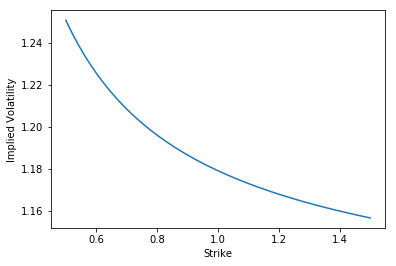

In [4]:
# obtain the implied volatility
strike = np.linspace(0.5, 1.5, 50)
bsm_vol = Exact_32Model.vol_smile(strike, spot, texp)

plt.plot(strike, bsm_vol)
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.show()

### Comment

The most time consuming step when sampling from the conditional distribution is the evaluation of the modified Bessel function of the first kind, $I_\nu(z)$, which has to be evaluated at **complex** $\nu$. Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) points out that

*"The computational time taken is highly dependent on one's experience with MATHEMATICA's procedural programming, and should the modified Bessel function of the first kind, allowing for $\nu$ to be complex, become available for other computing packages, or should one choose to implement it, the computational times can be expected to differ substantially."*

[scipy.special.iv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.iv.html#scipy.special.iv): Modified Bessel function of the first kind of **real** order.

[mpmath.besseli](http://mpmath.org/doc/current/functions/bessel.html): Modified Bessel function of the first kind, allowing for order to be complex. Use [numpy.frompyfunc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.frompyfunc.html) to make [mpmath.besseli](http://mpmath.org/doc/current/functions/bessel.html) work on numpy arrays, but it seems numpy arrays don't know about mpc objects, they cannot speed up these operations.

In [6]:
start_time = timeit.default_timer()
besseli(250-20j, 14)
elapsed = timeit.default_timer() - start_time
print("Calculating such Bessel function for 50000 times costs %.4fs" % (elapsed * 50000))

Calculating such Bessel function for 50000 times costs 48.7309s


The characteristic function of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
\Phi(a) = E\left({\rm exp}\left\lbrace ia \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2-8ia/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$

When $\epsilon$ and $\kappa$ are both very small, the argument of the Bessel function will be very large

$$
-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)} \rightarrow \frac{4\sqrt{X_tX_0}}{\epsilon^2 t}
$$

Hence, we cannot make $\epsilon$ too small.

In [7]:
mp.dps = 8
print("The magnitude of the value of Bessel function when mr and vov is 1e-1 is", end = ' ')
print(besseli(1e1+1e1j, 1e2))
print("The magnitude of the value of Bessel function when mr and vov is 1e-2 is", end = ' ')
print(besseli(1e2+1e2j, 1e4))

The magnitude of the value of Bessel function when mr and vov is 1e-1 is (5.7459739e+41 - 9.048899e+41j)
The magnitude of the value of Bessel function when mr and vov is 1e-2 is (1.8981489e+4340 - 2.956517e+4340j)


In [15]:
# make comparison with BS formula
strike = np.ones(1)
Bsm_Model = pyfe.BsmModel(sigma, intr = intr)
price1 = Bsm_Model.price(strike, spot, texp)

Exact_32Model = pyfe.ExactMC32Model(sigma, vov=0.1, mr=1e-6, rho=rho, theta_ratio=1.0, intr=intr)
Exact_32Model.setExactMCparams(n_paths = 1000)
price2 = Exact_32Model.price(strike, spot, texp)

print("The price given by Black Scholes formula is %.6f" % price1)
print("The price given by exact simulation of the 3/2 model is %.6f" % price2)

The price given by Black Scholes formula is 0.398402
The price given by exact simulation of the 3/2 model is 0.408239


## Conditional MC of the 3/2 Model

Use Milstain scheme to simulate the path of variance and antithetic method to reduce MC variance

$$
V_{t_{k+1}} = V_{t_{k}} + \kappa V_{t_{k}}(\theta - V_{t_{k}})\Delta t + \epsilon V_{t_{k}}^{3/2}\sqrt{\Delta t}W_1 + \frac{3\epsilon^2 V_{t_{k}}^2}{4}(W_1^2 - 1)\Delta t
$$

Then, use Simpson's Rule to obtain the integrated variance $\int_0^t V_s ds$

In [8]:
# set the parameters
spot = 1
strike = np.ones(1)
mr = 2
theta_ratio = 1.5
vov = 0.2
rho = -0.5
sigma = 1
texp = 1
intr = 0.05
n_paths = 10000
n_steps = 20

In [11]:
Cond_32Model = pyfe.Exact_32Model.CondMC32Model(sigma, vov, rho, mr, theta_ratio=theta_ratio, intr=intr)
Cond_32Model.setCondMCparams(n_paths=n_paths, n_steps=n_steps)

# obtain the price
price = np.array([Cond_32Model.price(strike, spot, texp) for i in range(30)])

print("The price estimate is %.6f" % price.mean())
print("The standard error is %.6f" % price.std())

The price estimate is 0.414605
The standard error is 0.002850


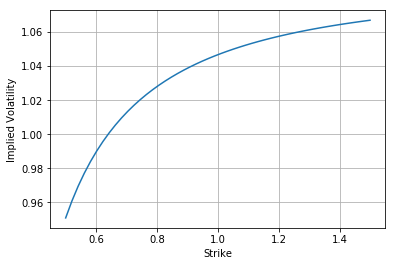

In [12]:
# obtain the implied volatility
strike = np.linspace(0.5, 1.5, 50)
bsm_vol = Cond_32Model.vol_smile(strike, spot, texp)

plt.plot(strike, bsm_vol)
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.show()